In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

L = 10
SIZE = 10**3

In [48]:
# 10x10x10 lattice. First, try the low temperature case:
J3K0 = np.transpose(np.loadtxt('winding_J=3_K=0_full_xy3d_n10.txt'))

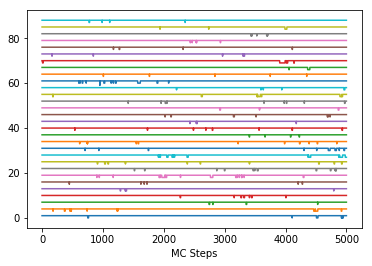

In [64]:
# Measurements every tenth of an MC step. The spacing used below makes the time axis of the 
# plot below in MC steps. I've subtracted 70 from len(J3K0) to make the plot more readable. 
for row in xrange(len(J3K0) - 70):
    plt.plot(range(len(J3K0[row, ::L])), (J3K0[row, ::L] + 3 * row))
plt.xlabel('MC Steps')
plt.show()

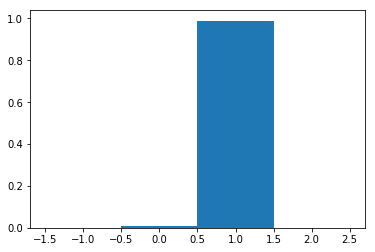

In [52]:
# If we histogram frequencies, we find a large peak at 1, as expected.
cont_J3K0 = J3K0[0]
for row in J3K0[1:]:
    cont_J3K0 = np.append(cont_J3K0, row)
plt.hist(cont_J3K0, bins=[-1.5, -0.5, 0.5, 1.5, 2.5], density=True)
plt.show()

In [54]:
# Now try the same thing inside region I. Let's do J=1.6:
J16K0 = np.transpose(np.loadtxt('winding_J=1.6_K=0_full_xy3d_n10.txt'))

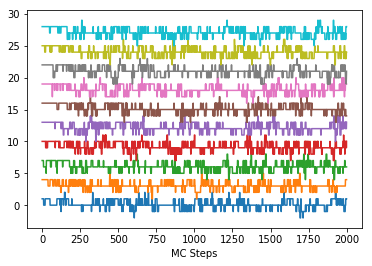

In [78]:
for row in xrange(len(J16K0) - 90):
    plt.plot(range(len(J16K0[row, ::L]))[:2000], (J16K0[row, ::L] + 3 * row)[:2000])
plt.xlabel('MC Steps')
plt.show()

(array([0.00466667, 0.08533333, 0.90866667, 0.00133333]), array([-1.5, -0.5,  0.5,  1.5,  2.5]), <a list of 4 Patch objects>)


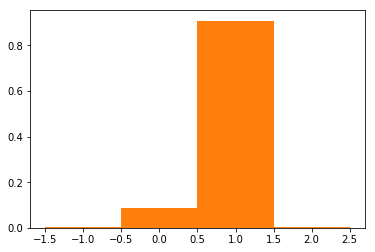

In [95]:
# What a mess. Although, I think we want to prevent the system from thermalizing, which, from the plot above,
# indicates that we should limit ourselves to around 250 MC steps? Make a histogram like before:
cont_J16K0 = J16K0[0, :300:L]
for row in J16K0[1:, :300:L]:
    cont_J16K0 = np.append(cont_J16K0, row)
plt.hist(cont_J16K0, bins=[-1.5, -0.5, 0.5, 1.5, 2.5], density=True)
print plt.hist(cont_J16K0, bins=[-1.5, -0.5, 0.5, 1.5, 2.5], density=True)
plt.show()

In [ ]:
# Okay so we can see that there are some 2pi vortices, but not many. Will increasing K
# help us? Let's start with (J, K) = (0.25, 0.5) and compare it to (J, K) = (0.25, 1.5)
L = 20

In [96]:
J25K5 = np.transpose(np.loadtxt('winding_J=0.25_K=0.5_full_xy3d_n20.txt'))

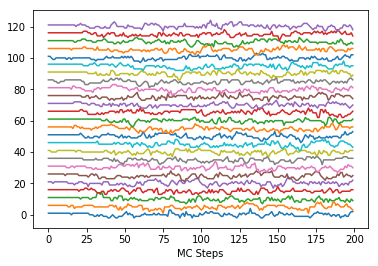

In [104]:
for row in xrange(len(J25K5) - 375):
    plt.plot(range(len(J25K5[row, ::L]))[:200], (J25K5[row, ::L] + 5 * row)[:200])
plt.xlabel('MC Steps')
plt.show()

(array([0.00767498, 0.0471344 , 0.21948778, 0.68607658, 0.03779094,
       0.00183532]), array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5]), <a list of 6 Patch objects>)


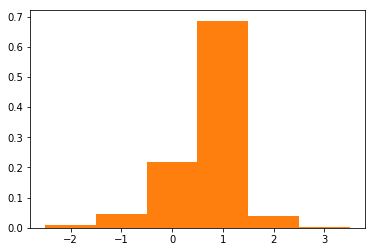

In [128]:
cont_J25K5 = J25K5[0, :300:L]
for row in J25K5[1:, :300:L]:
    cont_J25K5 = np.append(cont_J25K5, row)
plt.hist(cont_J25K5, bins=[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5], density=True)
print plt.hist(cont_J25K5, bins=[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5], density=True)
plt.show()

In [129]:
# Now let's compare! Hmm... if we only look at 300 MC steps, everythings still at nu=1...
J25K8 = np.transpose(np.loadtxt('winding_J=0.25_K=0.8_full_xy3d_n20.txt'))

(array([0.00000000e+00, 1.90833333e-02, 9.80750000e-01, 1.66666667e-04]), array([-1.5, -0.5,  0.5,  1.5,  2.5]), <a list of 4 Patch objects>)


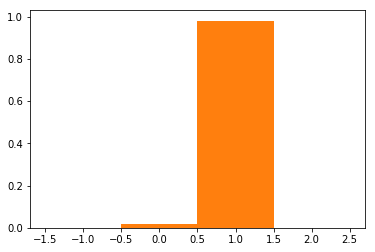

In [132]:
# if we just do 300 MC steps as before, we can't see anything interesting
cont_J25K8 = J25K8[0, :300:L]
for row in J25K8[1:, :300:L]:
    cont_J25K8 = np.append(cont_J25K8, row)
plt.hist(cont_J25K8, bins=[-1.5, -0.5, 0.5, 1.5, 2.5], density=True)
print plt.hist(cont_J25K8, bins=[-1.5, -0.5, 0.5, 1.5, 2.5], density=True)
plt.show()

(array([0.00245221, 0.07096387, 0.92273046, 0.00385347]), array([-1.5, -0.5,  0.5,  1.5,  2.5]), <a list of 4 Patch objects>)


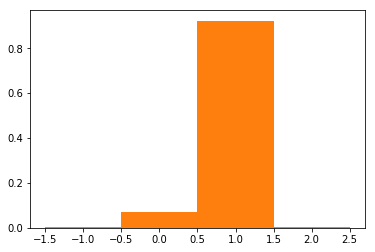

In [131]:
# With 1000, it looks like 2pi vortices are suppressed
cont_J25K8 = J25K8[0, :1000:L]
for row in J25K8[1:, :1000:L]:
    cont_J25K8 = np.append(cont_J25K8, row)
plt.hist(cont_J25K8, bins=[-1.5, -0.5, 0.5, 1.5, 2.5], density=True)
print plt.hist(cont_J25K8, bins=[-1.5, -0.5, 0.5, 1.5, 2.5], density=True)
plt.show()

In [ ]:
# but with 5000, the number of 2pi vortices are co